-------------------
### Linear Transformation 
- examples
-------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Type of L.T :  Matrix Transformation

In [3]:
# Define a matrix for the transformation
A = np.array([[2, 1],
              [0, -1]])

In [4]:
# Create a set of points as a 2D array
points = np.array([[1, 2],
                   [2, 3],
                   [3, 4],
                   [4, 5]])

In [5]:
# Perform the matrix transformation on the points
transformed_points = np.dot(points, A)  # Transpose A for matrix multiplication

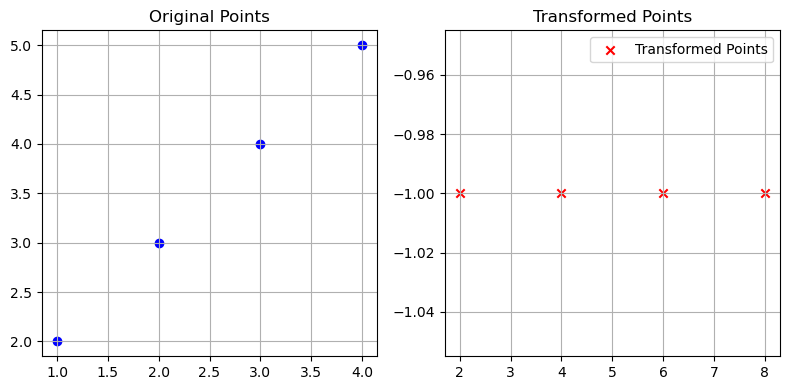

In [6]:
# Plot the original and transformed points
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Original Points')
plt.title('Original Points')
plt.grid()

plt.subplot(122)
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='red', marker='x', label='Transformed Points')
plt.title('Transformed Points')
plt.grid()

plt.tight_layout()
plt.legend()
plt.show()

#### Example - use : Image Processing

- image filtering, blurring, edge detection, and transformations such as rotations and scaling

**Image Filtering (Convolution)**

In [8]:
import cv2
import numpy as np

In [9]:
# Load an image
image = cv2.imread(r"D:\gridflowAI\gridflowAI-datasets-icons\AI-DATASETS\01-MISC\misc-images\bks4.jpg")

In [10]:
if image is None:
    print("Error: Could not load the image.")

In [11]:
# Define a filter kernel (e.g., a simple blur)
kernel = np.array([[0.625, 0.125, 0.0625],
                   [0.125,  0.25,  0.125],
                   [0.625, 0.125, 0.0625]])

In [12]:
# Apply the convolution operation using OpenCV
filtered_image = cv2.filter2D(image, -1, kernel)

In [93]:
# # Display the filtered image
# cv2.imshow('Filtered Image', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

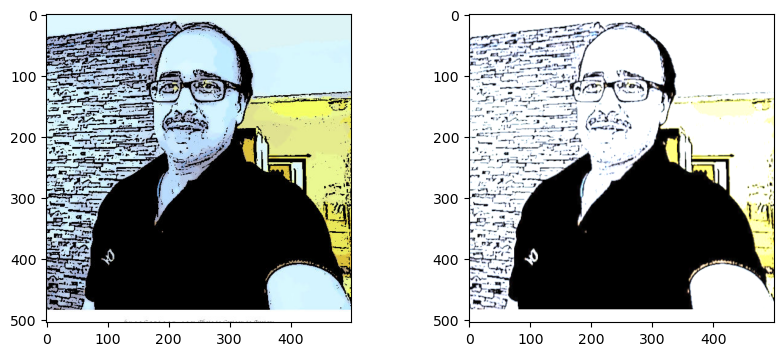

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image);
plt.subplot(122)
plt.imshow(filtered_image);

**Blurring (Gaussian Blur):**

In [95]:
# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (5, 5), 24)


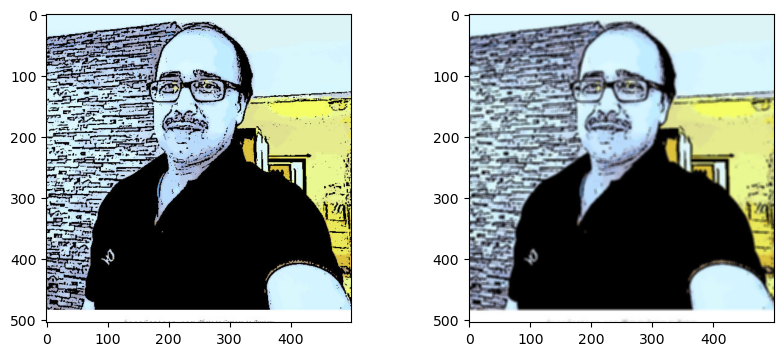

In [96]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image);
plt.subplot(122)
plt.imshow(blurred_image);

**Edge Detection (Canny Edge Detection)**

In [97]:
# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)

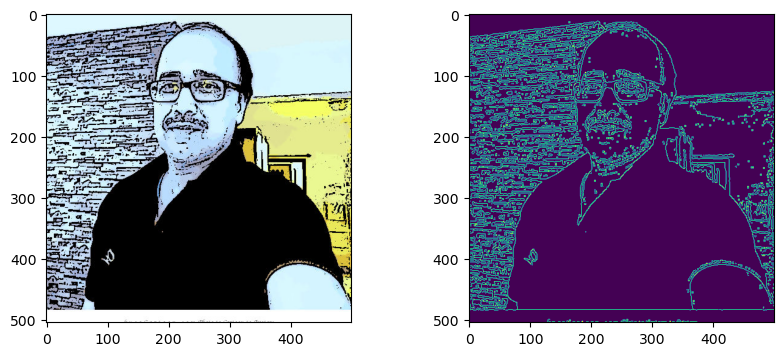

In [98]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image);
plt.subplot(122)
plt.imshow(edges);

**Rotations (Affine Transformation)**

In [14]:
# Define the rotation angle (e.g., 45 degrees)
angle = 45

# Define the rotation matrix
center = tuple(np.array(image.shape[1::-1]) / 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Perform the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)


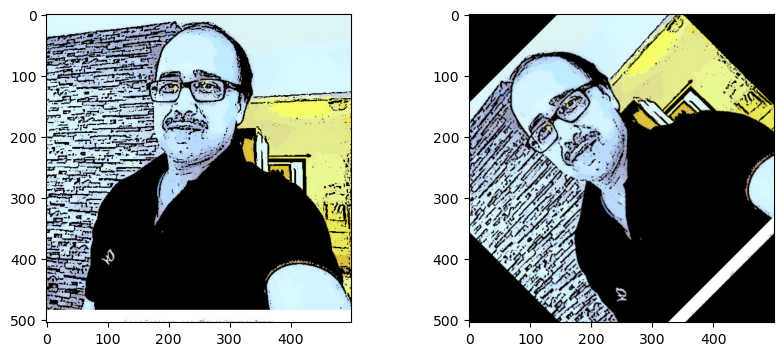

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image);
plt.subplot(122)
plt.imshow(rotated_image);

**Scaling (Affine Transformation)**

In [105]:
# Define scaling factors (e.g., scale by 2 in both dimensions)
scale_x = .2
scale_y = .2

# Calculate the new dimensions after scaling
new_width = int(image.shape[1] * scale_x)
new_height = int(image.shape[0] * scale_y)

# Perform the scaling
scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

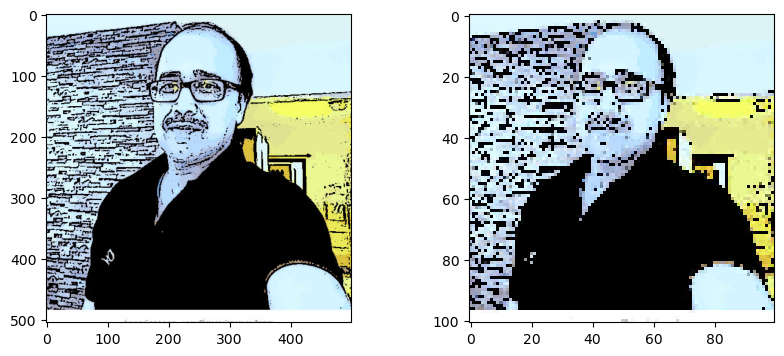

In [106]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image);
plt.subplot(122)
plt.imshow(scaled_image);

#### Example use : Feature Engg

**1. Scaling Features**

- we apply a scaling matrix to scale the data points.

In [107]:
# Generate sample data
data = np.random.randn(100, 2) * 5

In [112]:
# Define a scaling matrix
scaling_matrix = np.array([[20, 0],
                           [0, 30]])

In [113]:
# Apply scaling to the data
scaled_data = np.dot(data, scaling_matrix)

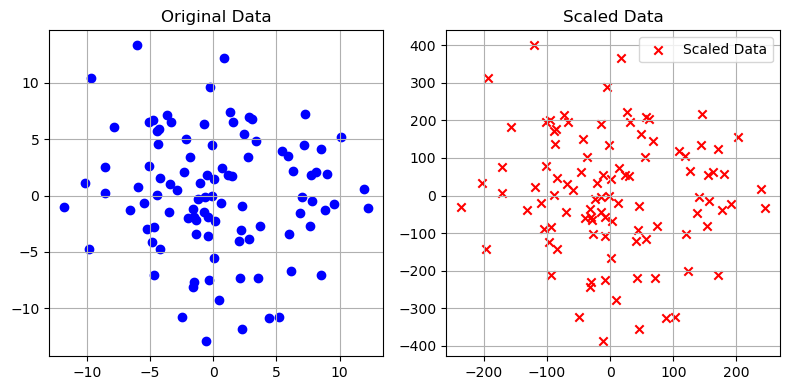

In [114]:
# Plot the original and scaled data
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Original Data')
plt.title('Original Data')
plt.grid()

plt.subplot(122)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c='red', marker='x', label='Scaled Data')
plt.title('Scaled Data')
plt.grid()

plt.tight_layout()
plt.legend()
plt.show()


**2. Principal Component Analysis (PCA)**

In [115]:
from sklearn.decomposition import PCA

In [116]:
# Generate sample data
data = np.random.randn(100, 2) * 5

In [117]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=1)
transformed_data = pca.fit_transform(data)

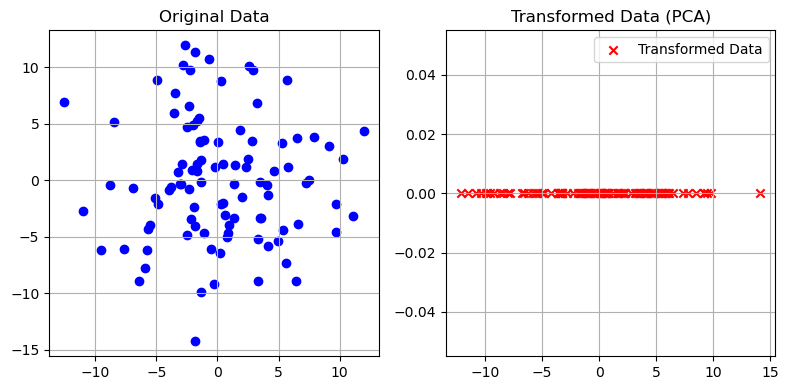

In [118]:
# Plot the original and transformed data
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Original Data')
plt.title('Original Data')
plt.grid()

plt.subplot(122)
plt.scatter(transformed_data, np.zeros_like(transformed_data), c='red', marker='x', label='Transformed Data')
plt.title('Transformed Data (PCA)')
plt.grid()

plt.tight_layout()
plt.legend()
plt.show()

**3. Polynomial Feature Expansion**

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
# Generate sample data
x = np.linspace(-5, 5, 100)
y = x**2 + 2 * x + 1

In [121]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x.reshape(-1, 1))

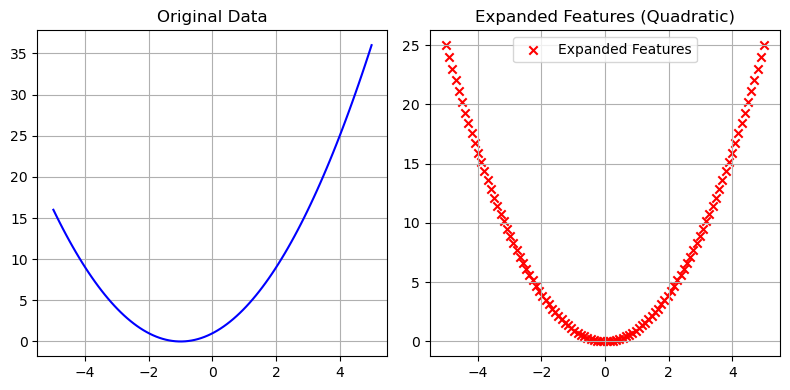

In [122]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x, y, 'b', label='Original Data')
plt.title('Original Data')
plt.grid()

plt.subplot(122)
plt.scatter(X_poly[:, 0], X_poly[:, 1], c='red', marker='x', label='Expanded Features')
plt.title('Expanded Features (Quadratic)')
plt.grid()

plt.tight_layout()
plt.legend()

**4. perform Principal Component Analysis (PCA) in 3D and visualize the transformed data in a 3D plot**

In [123]:
from mpl_toolkits.mplot3d import Axes3D

In [124]:
# Generate 3D sample data
np.random.seed(0)
mean = [0, 0, 0]
cov  = [[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2, 0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 100)

In [125]:
# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

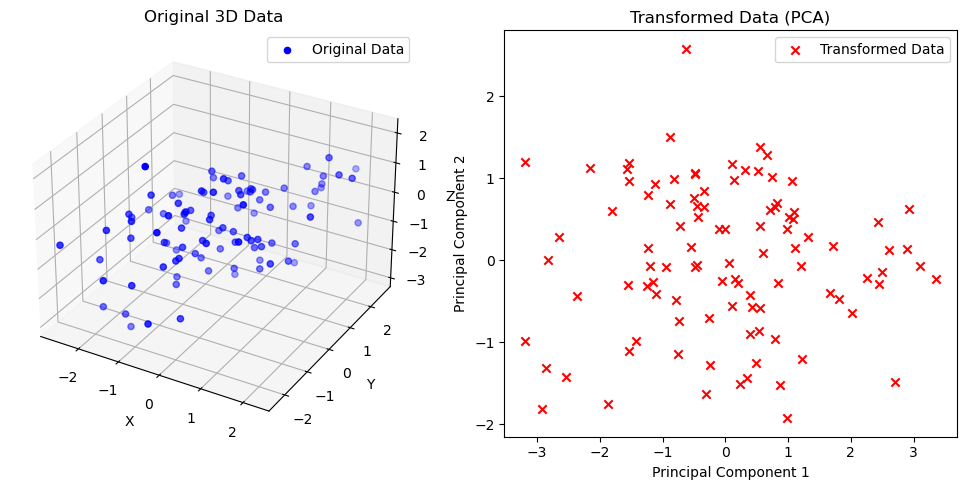

In [126]:
# Create a 3D scatter plot of the original data
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', label='Original Data')
ax1.set_title('Original 3D Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Create a 2D scatter plot of the transformed data after PCA
ax2 = fig.add_subplot(122)
ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], c='red', marker='x', label='Transformed Data')
ax2.set_title('Transformed Data (PCA)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

plt.tight_layout()